**Course**: Data Visualization (Prof. Dr. Heike Leitte, Jan-Tobias Sohns, TU Kaiserslautern),   **Name**: Arne Stoll,   **Date**: 25.11.2020

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas. 

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [2]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [3]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A link to the Documentation of pandas.describe:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
* Columns which are categorial have entries for unique, top and freq. That makes then sense because how would one calculate the means of a categorial data. Since it is not possible the entries mean, std and so on are just marked with NaN.
* Numerical columns on the other hand have only entries for mean, min, max etc. but not for freq, top and so on
* So it follows that the statistics combine numerical and categorial analysis in one table

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [4]:
titanic['deck'].value_counts(sort=True, dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

Following code extracts a column of the DataFrame (a so to say Series in pandas)
> titanic['deck'] 

The attribute 

> dropna=False

lets us see how many tuples have no fixed category. It follows that about 688 people havent had an assigned deck.

<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**: 

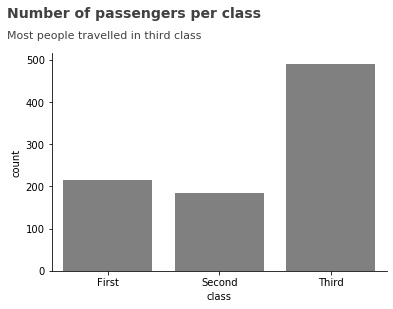

In [5]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Finish the histogram below. 
- Set an appropriate number of bins and add a subtitle that tells about one finding. 
- Can you detect different price groups?
</div>

891


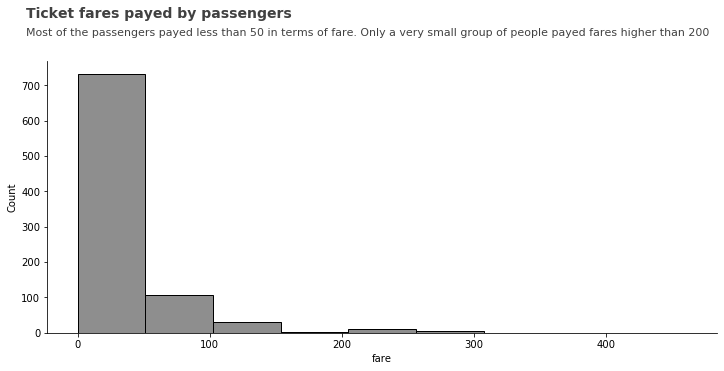

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
max = titanic['fare'].max()
min = titanic['fare'].min()

# Good to know when applying the rule of thumb (slide 05-12)
# Counts number of non-NA/null entries
print(titanic['fare'].count())

# Using for the number of bins the rule of thumb
ax = sns.histplot(data=titanic["fare"], color="dimgray", kde=False, bins=np.arange(min,max,max/10))

fig.text(x=.1, y=1, s="Ticket fares payed by passengers", fontsize=14, fontweight='semibold', color='#414141')
fig.text(x=.1, y=.95, s="Most of the passengers payed less than 50 in terms of fare. Only a very small group of people payed fares higher than 200", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart. Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

In [7]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

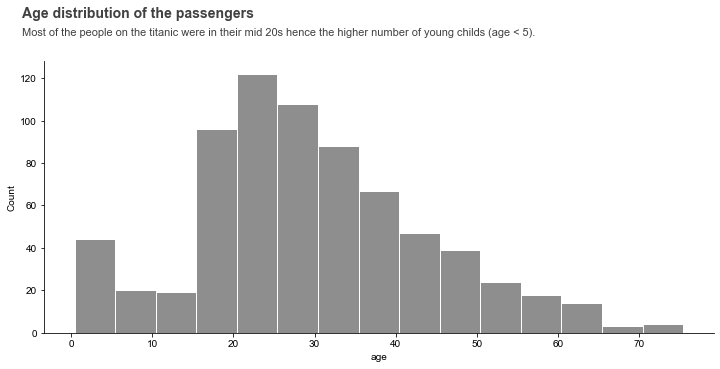

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style("white")

min = titanic['age'].min()
max = titanic['age'].max()

ax = sns.histplot(data=titanic['age'], color="dimgray", kde=False, bins=np.arange(min,max,max/16))

fig.text(x=.1, y=1, s="Age distribution of the passengers", fontsize=14, fontweight='semibold', color='#414141')
fig.text(x=.1,y=.95, s="Most of the people on the titanic were in their mid 20s hence the higher number of young childs (age < 5).", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

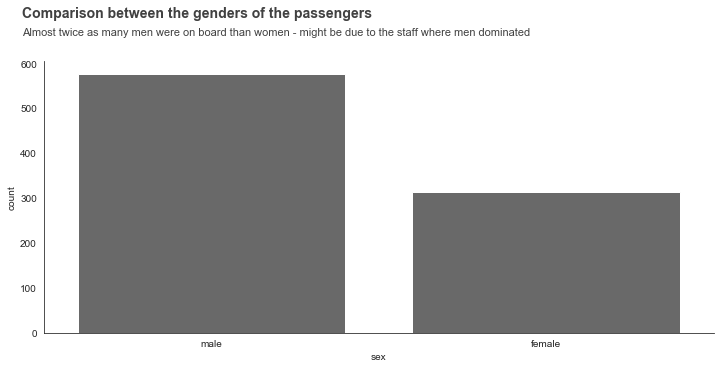

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x='sex', data=titanic, color="dimgray")

fig.text(x=.1, y=1, s="Comparison between the genders of the passengers", fontsize=14, fontweight='semibold', color='#414141')
fig.text(x=.1, y=.95, s="Almost twice as many men were on board than women - might be due to the staff where men dominated", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children?
</div>

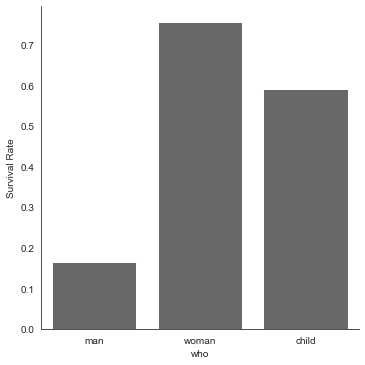

In [10]:
# using sns.catplot for combination of FacetGrid and countplot
# allows grouping with additional categorial variables
ax = sns.catplot(data=titanic, x='who', y='survived', color='dimgray', kind='bar', ci=None)
ax.set_axis_labels("who", "Survival Rate")

sns.despine()

<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

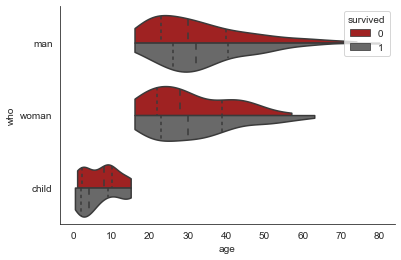

In [16]:
# looks like the one from the OLAT test
fg = sns.violinplot(cut=0, data=titanic, x='age', y='who', split=True, hue='survived', palette=['#b40d0d', 'dimgray'], inner='quartile')
sns.despine()

**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [12]:
titanic['alive'].value_counts() / len(titanic)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [13]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

Survival rate per deck:
{'A': 0.4666666666666667, 'B': 0.7446808510638298, 'C': 0.5932203389830508, 'D': 0.7575757575757576, 'E': 0.75, 'F': 0.6153846153846154, 'G': 0.5, 'None': 0.29941860465116277}


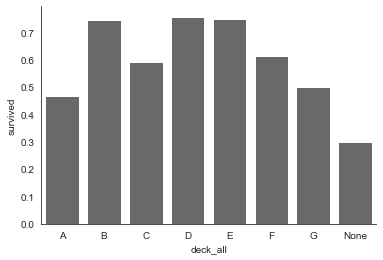

In [14]:
# calc survival rate by deck
temp = titanic['deck_all'].cat.categories
surRateDeck = {}
for cat in temp:
    deckEach =  len(titanic[titanic['deck_all'] == cat])
    deckEachSur = len(titanic[titanic[['deck_all', 'survived']].apply(tuple, 1).isin([(cat, 1)])])
    surRateDeck[cat] = deckEachSur / deckEach
print('Survival rate per deck:')
print(surRateDeck)
    
fig = sns.barplot(data=titanic, x='deck_all', y='survived', color='dimgray', ci=None)
sns.despine()

<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says: 
> It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.
</div>

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source: [Essay terms explained by University of Leicester](https://www2.le.ac.uk/offices/ld/resources/writing/writing-resources/essay-terms)


### Answer:
<div class="alert alert-warning">
A ticket for the first class on the Titanic was very expensive and not everyone could afford such high price. Accordingly one could say that only the wealthier elderly people could afford the first class. A friend of mine had claimed the following statement: "It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.". Is this statement true was the first class really an old people's club? In order answer this question and clarify whether this statement is fake news or not we will first clarify what an elderly passenger is. Since the life expectancy back in 1912 in europe (where the Titanic sunk) was about 50 years (see map at https://ourworldindata.org/life-expectancy) i will consider every passenger on the titanic older than 50 as an elderly person. When looking at the chart 2 one can see that the age distribution of the first class passengers (red line) does not tend to have its peak within the age 50 to 60. The peak lies at approximately at 38 years. Also the age of the passengers is normal distributed hence not only elderly people had a good trip with a high class ticket. Therefore there are approximately as many young passengers in the first class as old passengers. As the statement says "[...]Only elderly people could afford First Class[...]" is wrong as explained before. However in comparision to the third and second class the first class tended to have more elderly people than the other two classes. It follows that if elderly people booked tickets then they tended to buy first class tickets. A sad truth is that twice as many elderly people in the first class did not survive. This might be due to the fact that elderly people are weaker than young people and also that younger passengers and children had priority when it comes to the lifeboats. In conclusion the first class was not dominated by elderly people but most of the elderly passengers were in the first class. The chart proves the statement wrong and also young people had a good time in the first class at the titanic.
</div>

### Supporting charts:

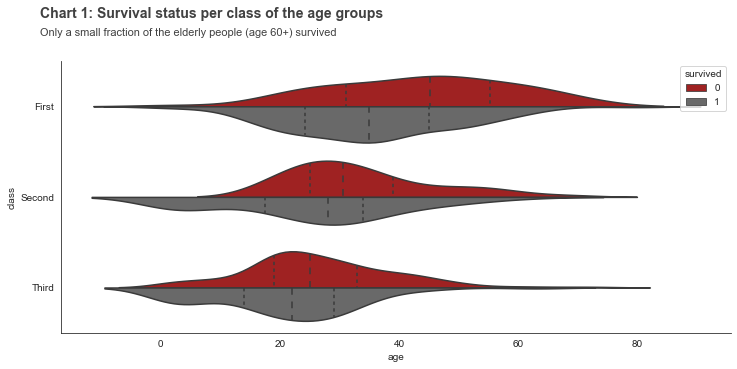

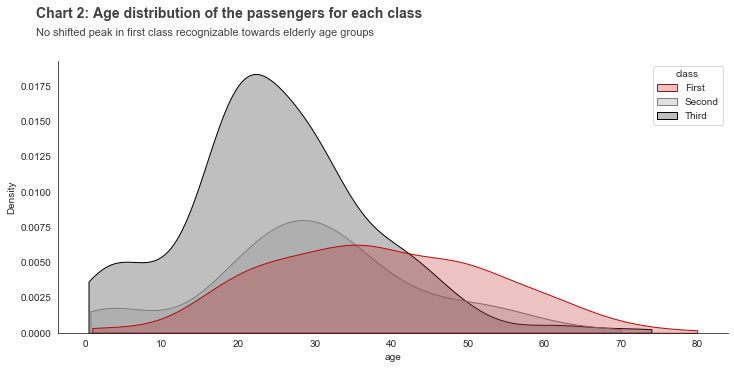

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.violinplot(data=titanic, x='age', y='class', hue='survived', split=True, inner='quartile', palette=['#b40d0d', 'dimgray'], shade='fill')

fig.text(x=.1, y=1, s="Chart 1: Survival status per class of the age groups", fontsize=14, fontweight='semibold', color='#414141')
fig.text(x=.1, y=.95, s="Only a small fraction of the elderly people (age 60+) survived", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.kdeplot(data=titanic, x='age', hue='class', cut=0, shade='fill', palette=['#b40d0d', 'gray', 'black'])

fig.text(x=.1, y=1, s="Chart 2: Age distribution of the passengers for each class", fontsize=14, fontweight='semibold', color='#414141')
fig.text(x=.1, y=.95, s="No shifted peak in first class recognizable towards elderly age groups", fontsize=11, fontweight='normal', color='#414141')
sns.despine()